In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



ModuleNotFoundError: No module named 'tensorflow'

In [14]:
(X_train, y_train),(X_test, y_test) =keras.datasets.mnist.load_data()





In [3]:
len(X_train)


60000

In [4]:
len(X_test)


10000

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train[0].shape


(28, 28)

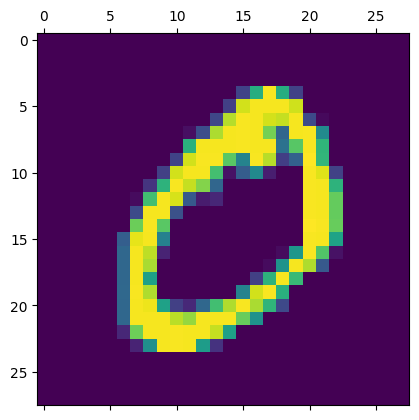

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[1]


0

In [10]:
y_train[:]


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
 X_train_flattened=X_train.reshape(len(X_train),28*28)
 X_test_flattened=X_test.reshape(len(X_test),28*28)

X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8129 - loss: 0.7228
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9151 - loss: 0.3078
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9213 - loss: 0.2803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9221 - loss: 0.2753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9274 - loss: 0.2650


In [15]:
model.evaluate(X_test_flattened, y_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9173 - loss: 0.2979


[0.2647739052772522, 0.9276999831199646]

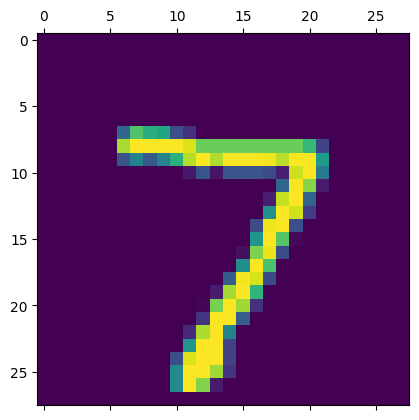

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([2.0844726e-02, 3.7858379e-07, 8.6266182e-02, 9.5956558e-01,
       2.2871252e-03, 1.0732397e-01, 1.3442020e-06, 9.9982280e-01,
       1.0427110e-01, 7.4195081e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[0])

7

y_test[:5]

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    4,    2,    0,    5,    7,    3,    3,    1],
       [   0, 1110,    4,    1,    0,    1,    4,    2,   13,    0],
       [   3,    9,  942,   12,    8,    5,   13,    8,   29,    3],
       [   2,    0,   24,  904,    0,   36,    2,   11,   22,    9],
       [   1,    1,    6,    1,  912,    0,    9,    5,    9,   38],
       [   7,    3,    4,   23,    6,  795,   14,    6,   28,    6],
       [   7,    3,    6,    1,    7,   18,  911,    2,    3,    0],
       [   1,    5,   25,    4,    9,    0,    0,  949,    2,   33],
       [   5,    7,    7,   15,    9,   31,    9,   13,  872,    6],
       [   7,    7,    3,    8,   20,    9,    0,   21,    7,  927]])>

Text(95.72222222222221, 0.5, 'Truth')

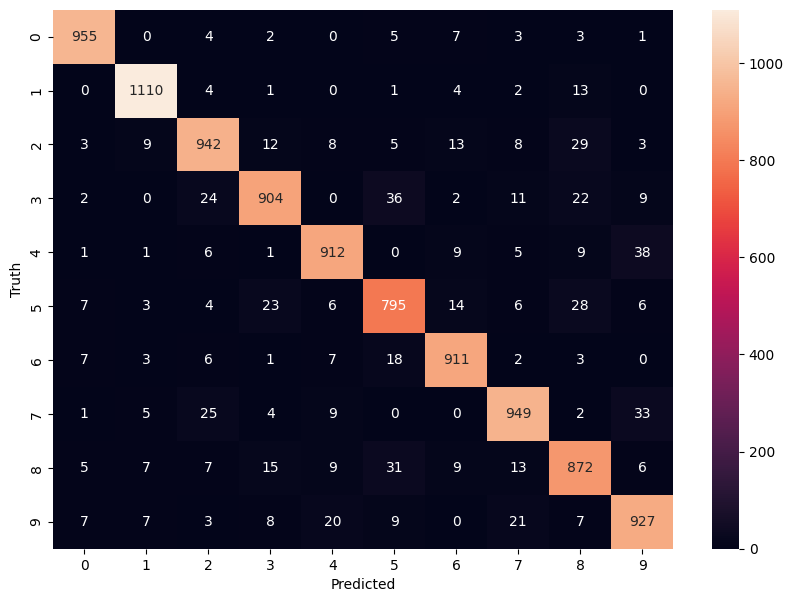

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8706 - loss: 0.4540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9609 - loss: 0.1360
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9727 - loss: 0.0928
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9802 - loss: 0.0652
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9857 - loss: 0.0489
